In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv('bank_transactions_data_2.csv')

# Hiển thị thông tin cơ bản về bộ dữ liệu
print("Thông tin dữ liệu:")
print("-" * 50)
df.info()
print("\nMẫu dữ liệu:")
print("-" * 50)
df.head()


Thông tin dữ liệu:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAtt

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


Phân tích số tiền giao dịch
--------------------------------------------------

Thống kê số tiền giao dịch:
count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64

Số lượng giao dịch bất thường (số tiền > 1173.43): 48


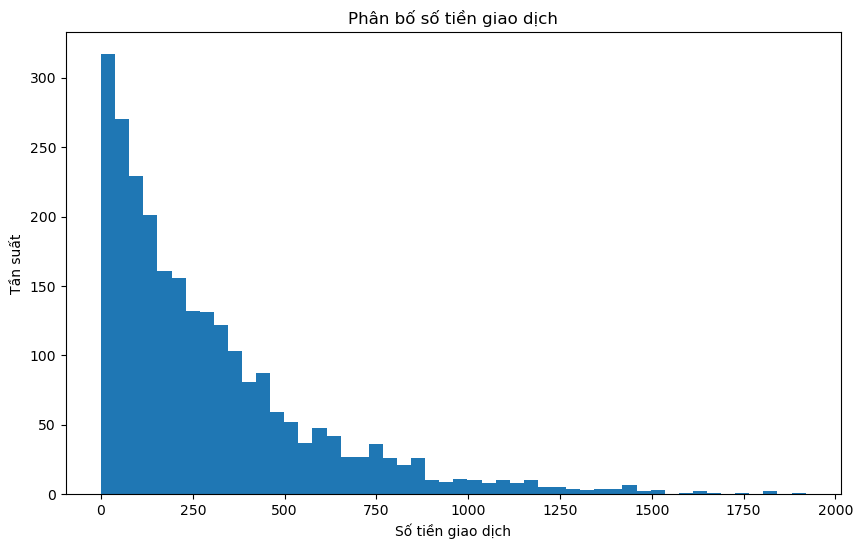

In [9]:
# 1. Phân tích số tiền giao dịch
print("Phân tích số tiền giao dịch")
print("-" * 50)

# Tính toán các chỉ số thống kê cho số tiền giao dịch
amount_stats = df['TransactionAmount'].describe()
print("\nThống kê số tiền giao dịch:")
print(amount_stats)

# Xác định ngưỡng cho giao dịch bất thường (ví dụ: 3 độ lệch chuẩn từ giá trị trung bình)
amount_threshold = amount_stats['mean'] + 3 * amount_stats['std']
unusual_amounts = df[df['TransactionAmount'] > amount_threshold]

print(f"\nSố lượng giao dịch bất thường (số tiền > {amount_threshold:.2f}): {len(unusual_amounts)}")

# Trực quan hóa phân bố số tiền giao dịch
plt.figure(figsize=(10, 6))
plt.hist(df['TransactionAmount'], bins=50)
plt.title('Phân bố số tiền giao dịch')
plt.xlabel('Số tiền giao dịch')
plt.ylabel('Tần suất')
plt.show()


In [10]:
# 2. Phân tích số dư tài khoản
print("Phân tích số dư tài khoản")
print("-" * 50)

# Kiểm tra số dư âm
negative_balances = df[df['AccountBalance'] < 0]
print(f"\nSố lượng giao dịch có số dư âm: {len(negative_balances)}")

# Tính tỷ lệ giữa số tiền giao dịch và số dư tài khoản
df['Transaction_Balance_Ratio'] = df['TransactionAmount'] / df['AccountBalance']
suspicious_ratio = df[df['Transaction_Balance_Ratio'] > 0.9]  # Giao dịch sử dụng >90% số dư
print(f"\nSố lượng giao dịch sử dụng >90% số dư tài khoản: {len(suspicious_ratio)}")

# Phân tích mẫu giao dịch theo tài khoản
print("\nPhân tích tần suất giao dịch")
print("-" * 50)

# Chuyển đổi PreviousTransactionDate sang định dạng datetime
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Tính khoảng thời gian giữa các giao dịch
df['TimeSincePrevious'] = (df['PreviousTransactionDate'].shift(-1) - df['PreviousTransactionDate'])
df['TimeSincePrevious'] = df['TimeSincePrevious'].dt.total_seconds() / 3600  # Chuyển đổi sang giờ

# Xác định các giao dịch liên tiếp nhanh
rapid_transactions = df[df['TimeSincePrevious'] < 1]  # Dưới 1 giờ giữa các giao dịch
print(f"\nSố lượng giao dịch liên tiếp nhanh (<1 giờ): {len(rapid_transactions)}")


Phân tích số dư tài khoản
--------------------------------------------------

Số lượng giao dịch có số dư âm: 0

Số lượng giao dịch sử dụng >90% số dư tài khoản: 129

Phân tích tần suất giao dịch
--------------------------------------------------

Số lượng giao dịch liên tiếp nhanh (<1 giờ): 2511


In [11]:
# 3. Phân tích mẫu vị trí, thiết bị và địa chỉ IP
print("Phân tích vị trí và thiết bị")
print("-" * 50)

# Phân tích vị trí theo tài khoản
location_counts = df.groupby('AccountID')['Location'].nunique()
multiple_locations = location_counts[location_counts > 1]
print(f"\nSố tài khoản có giao dịch từ nhiều vị trí: {len(multiple_locations)}")

# Phân tích thiết bị theo tài khoản
device_counts = df.groupby('AccountID')['DeviceID'].nunique()
multiple_devices = device_counts[device_counts > 2]  # Sử dụng hơn 2 thiết bị có thể đáng ngờ
print(f"\nSố tài khoản sử dụng hơn 2 thiết bị: {len(multiple_devices)}")

# Phân tích địa chỉ IP theo tài khoản
ip_counts = df.groupby('AccountID')['IP Address'].nunique()
multiple_ips = ip_counts[ip_counts > 3]  # Sử dụng hơn 3 IP có thể đáng ngờ
print(f"\nSố tài khoản sử dụng hơn 3 địa chỉ IP: {len(multiple_ips)}")

# Phân tích số lần đăng nhập
high_login_attempts = df[df['LoginAttempts'] > 3]
print(f"\nSố giao dịch có nhiều lần đăng nhập (>3): {len(high_login_attempts)}")

# Phân tích thời gian giao dịch
duration_stats = df['TransactionDuration'].describe()
print("\nThống kê thời gian giao dịch:")
print(duration_stats)

# Xác định giao dịch có thời gian bất thường dài
long_duration_threshold = duration_stats['mean'] + 2 * duration_stats['std']
long_transactions = df[df['TransactionDuration'] > long_duration_threshold]
print(f"\nSố giao dịch có thời gian bất thường dài (>{long_duration_threshold:.2f}): {len(long_transactions)}")


Phân tích vị trí và thiết bị
--------------------------------------------------

Số tài khoản có giao dịch từ nhiều vị trí: 470

Số tài khoản sử dụng hơn 2 thiết bị: 428

Số tài khoản sử dụng hơn 3 địa chỉ IP: 366

Số giao dịch có nhiều lần đăng nhập (>3): 64

Thống kê thời gian giao dịch:
count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64

Số giao dịch có thời gian bất thường dài (>259.57): 142


Phân tích loại giao dịch và kênh giao dịch
--------------------------------------------------

Phân bố loại giao dịch theo kênh:
Channel          ATM  Branch  Online
TransactionType                     
Credit            73     251     244
Debit            760     617     567

Tổng kết phát hiện gian lận
--------------------------------------------------
Tổng số giao dịch đã phân tích: 2512
Số giao dịch có khả năng gian lận (điểm >= 5): 65
Tỷ lệ giao dịch đáng ngờ: 2.59%


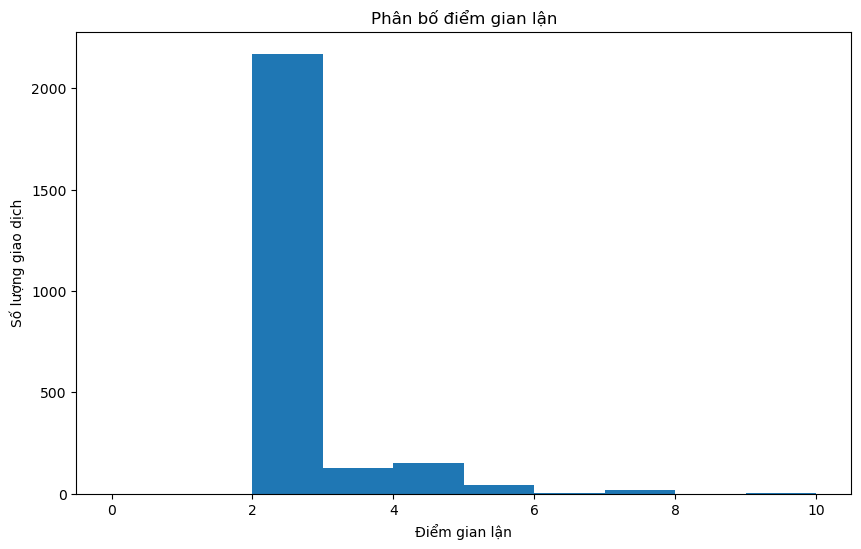


Ví dụ về các giao dịch có rủi ro cao:
     TransactionID  TransactionAmount  AccountBalance  LoginAttempts  \
274       TX000275            1176.28          323.69              5   
898       TX000899            1531.31          859.86              4   
74        TX000075            1212.51          605.95              1   
614       TX000615            1342.25          694.03              1   
2403      TX002404            1493.00         1619.16              1   

      TransactionDuration  FraudScore  
274                   174           9  
898                    62           9  
74                     24           7  
614                   235           7  
2403                  151           7  


In [12]:
# 4. Phân tích loại giao dịch và kênh giao dịch
print("Phân tích loại giao dịch và kênh giao dịch")
print("-" * 50)

# Phân tích phân bố loại giao dịch theo kênh
type_channel_dist = pd.crosstab(df['TransactionType'], df['Channel'])
print("\nPhân bố loại giao dịch theo kênh:")
print(type_channel_dist)

# Tạo điểm đánh giá gian lận dựa trên nhiều yếu tố rủi ro
def calculate_fraud_score(row):
    score = 0
    
    # Điểm số tiền giao dịch
    if row['TransactionAmount'] > amount_threshold:
        score += 3
    
    # Điểm số dư tài khoản
    if row['AccountBalance'] < 0:
        score += 3
    if row['Transaction_Balance_Ratio'] > 0.9:
        score += 2
    
    # Điểm số lần đăng nhập
    if row['LoginAttempts'] > 3:
        score += 2
    
    # Điểm thời gian giao dịch
    if row['TransactionDuration'] > long_duration_threshold:
        score += 1
    
    # Điểm thời gian giữa các giao dịch
    if row['TimeSincePrevious'] < 1:  # Dưới 1 giờ
        score += 2
    
    return score

# Tính điểm gian lận
df['FraudScore'] = df.apply(calculate_fraud_score, axis=1)

# Xác định ngưỡng gian lận tiềm năng
fraud_threshold = 5
potential_fraud = df[df['FraudScore'] >= fraud_threshold]

print("\nTổng kết phát hiện gian lận")
print("-" * 50)
print(f"Tổng số giao dịch đã phân tích: {len(df)}")
print(f"Số giao dịch có khả năng gian lận (điểm >= {fraud_threshold}): {len(potential_fraud)}")
print(f"Tỷ lệ giao dịch đáng ngờ: {(len(potential_fraud) / len(df)) * 100:.2f}%")

# Hiển thị phân bố điểm gian lận
plt.figure(figsize=(10, 6))
plt.hist(df['FraudScore'], bins=range(0, df['FraudScore'].max() + 2, 1))
plt.title('Phân bố điểm gian lận')
plt.xlabel('Điểm gian lận')
plt.ylabel('Số lượng giao dịch')
plt.show()

# Hiển thị một số ví dụ về giao dịch có rủi ro cao
print("\nVí dụ về các giao dịch có rủi ro cao:")
high_risk_sample = potential_fraud.sort_values('FraudScore', ascending=False).head()
print(high_risk_sample[['TransactionID', 'TransactionAmount', 'AccountBalance', 
                       'LoginAttempts', 'TransactionDuration', 'FraudScore']])


In [24]:
# 5. Tiền xử lý dữ liệu
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

print("Tiền xử lý dữ liệu")
print("-" * 50)

# 1. Kiểm tra và xử lý giá trị thiếu
print("\nKiểm tra giá trị thiếu:")
missing_values = df.isnull().sum()
print(missing_values)

# Xử lý giá trị thiếu nếu có
if missing_values.sum() > 0:
    # Với cột số: điền bằng trung vị
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    
    # Với cột phân loại: điền bằng giá trị phổ biến nhất
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# 2. Mã hóa biến phân loại
print("\nMã hóa biến phân loại:")

# Xác định các loại cột
id_cols = ['AccountID', 'TransactionID']  # Các cột ID cần giữ nguyên
ordinal_cols = ['TransactionType', 'Channel', 'CustomerOccupation']  # Các cột có thứ tự
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols_remaining = [col for col in categorical_cols 
                            if col not in ordinal_cols + id_cols]  # Các cột phân loại còn lại

print("Các cột ID:", id_cols)
print("Các cột có thứ tự:", ordinal_cols)
print("Các cột phân loại khác:", categorical_cols_remaining)

# Sử dụng LabelEncoder cho các cột có thứ tự
label_encoders = {}
for col in ordinal_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[f'{col}_encoded'] = le.fit_transform(df[col])
        label_encoders[col] = le
        print(f"\nMã hóa {col}:", dict(zip(le.classes_, le.transform(le.classes_))))

# One-hot encoding cho các cột phân loại còn lại
df_encoded = pd.get_dummies(df, columns=categorical_cols_remaining, prefix_sep='_')

# 3. Chuẩn hóa dữ liệu số
print("\nChuẩn hóa dữ liệu số:")
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
print("Các cột số:", numeric_cols.tolist())

scaler = StandardScaler()
numeric_cols_to_scale = [col for col in numeric_cols 
                        if col not in ['TransactionType_encoded', 'Channel_encoded', 'CustomerOccupation_encoded']]
df_encoded[numeric_cols_to_scale] = scaler.fit_transform(df_encoded[numeric_cols_to_scale])

# 4. Tạo đặc trưng mới
print("\nTạo đặc trưng mới:")

# Tính tổng số và giá trị giao dịch theo tài khoản
account_stats = df.groupby('AccountID').agg({
    'TransactionID': 'count',
    'TransactionAmount': ['sum', 'mean', 'std']
}).reset_index()
account_stats.columns = ['AccountID', 'total_transactions', 'total_amount', 'avg_amount', 'std_amount']

# Thêm các đặc trưng mới vào DataFrame
df_encoded = df_encoded.merge(account_stats, on='AccountID', how='left')

# Tính tỷ lệ giao dịch theo kênh và loại
for col in ['Channel', 'TransactionType']:
    if col in df.columns:
        ratios = df.groupby('AccountID')[col].value_counts(normalize=True).unstack(fill_value=0)
        ratios.columns = [f'{col}_ratio_{c}' for c in ratios.columns]
        df_encoded = df_encoded.merge(ratios, left_on='AccountID', right_index=True, how='left')

# Tính thời gian giữa các giao dịch
if 'PreviousTransactionDate' in df.columns:
    df_encoded['time_since_last_transaction'] = (pd.to_datetime(df['TransactionDate']) - 
                                               pd.to_datetime(df['PreviousTransactionDate'])).dt.total_seconds() / 3600

print("\nCác đặc trưng mới được tạo:")
new_features = [col for col in df_encoded.columns if col not in df.columns]
print(new_features)

# Hiển thị kích thước dữ liệu sau khi xử lý
print("\nKích thước dữ liệu sau khi xử lý:", df_encoded.shape)
print("\nMẫu dữ liệu sau khi xử lý:")
print(df_encoded.head())


Tiền xử lý dữ liệu
--------------------------------------------------

Kiểm tra giá trị thiếu:
TransactionID                 0
AccountID                     0
TransactionAmount             0
TransactionDate               0
TransactionType               0
Location                      0
DeviceID                      0
IP Address                    0
MerchantID                    0
Channel                       0
CustomerAge                   0
CustomerOccupation            0
TransactionDuration           0
LoginAttempts                 0
AccountBalance                0
PreviousTransactionDate       0
Transaction_Balance_Ratio     0
TimeSincePrevious             0
FraudScore                    0
TransactionType_encoded       0
Channel_encoded               0
CustomerOccupation_encoded    0
TotalTransactions_x           0
TotalAmount_x                 0
AvgTransactionAmount_x        0
StdTransactionAmount_x        0
AvgLoginAttempts_x            0
AvgTransactionDuration_x      0
TimeBetwe

CHỌN ĐẶC TRƯNG QUAN TRỌNG
--------------------------------------------------

Số lượng đặc trưng được sử dụng: 3960
Các đặc trưng: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'Transaction_Balance_Ratio', 'TimeSincePrevious', 'TransactionType_encoded', 'Channel_encoded', 'CustomerOccupation_encoded', 'TotalTransactions_x', 'TotalAmount_x', 'AvgTransactionAmount_x', 'StdTransactionAmount_x', 'AvgLoginAttempts_x', 'AvgTransactionDuration_x', 'TimeBetweenTransactions', 'TotalTransactions_y', 'TotalAmount_y', 'AvgTransactionAmount_y', 'StdTransactionAmount_y', 'AvgLoginAttempts_y', 'AvgTransactionDuration_y', 'TransactionDate_2023-01-02 16:00:06', 'TransactionDate_2023-01-02 16:01:14', 'TransactionDate_2023-01-02 16:01:26', 'TransactionDate_2023-01-02 16:06:29', 'TransactionDate_2023-01-02 16:07:17', 'TransactionDate_2023-01-02 16:22:54', 'TransactionDate_2023-01-02 16:27:18', 'TransactionDate_2023-01-02 16:30:09', 'TransactionDate_2023-01-

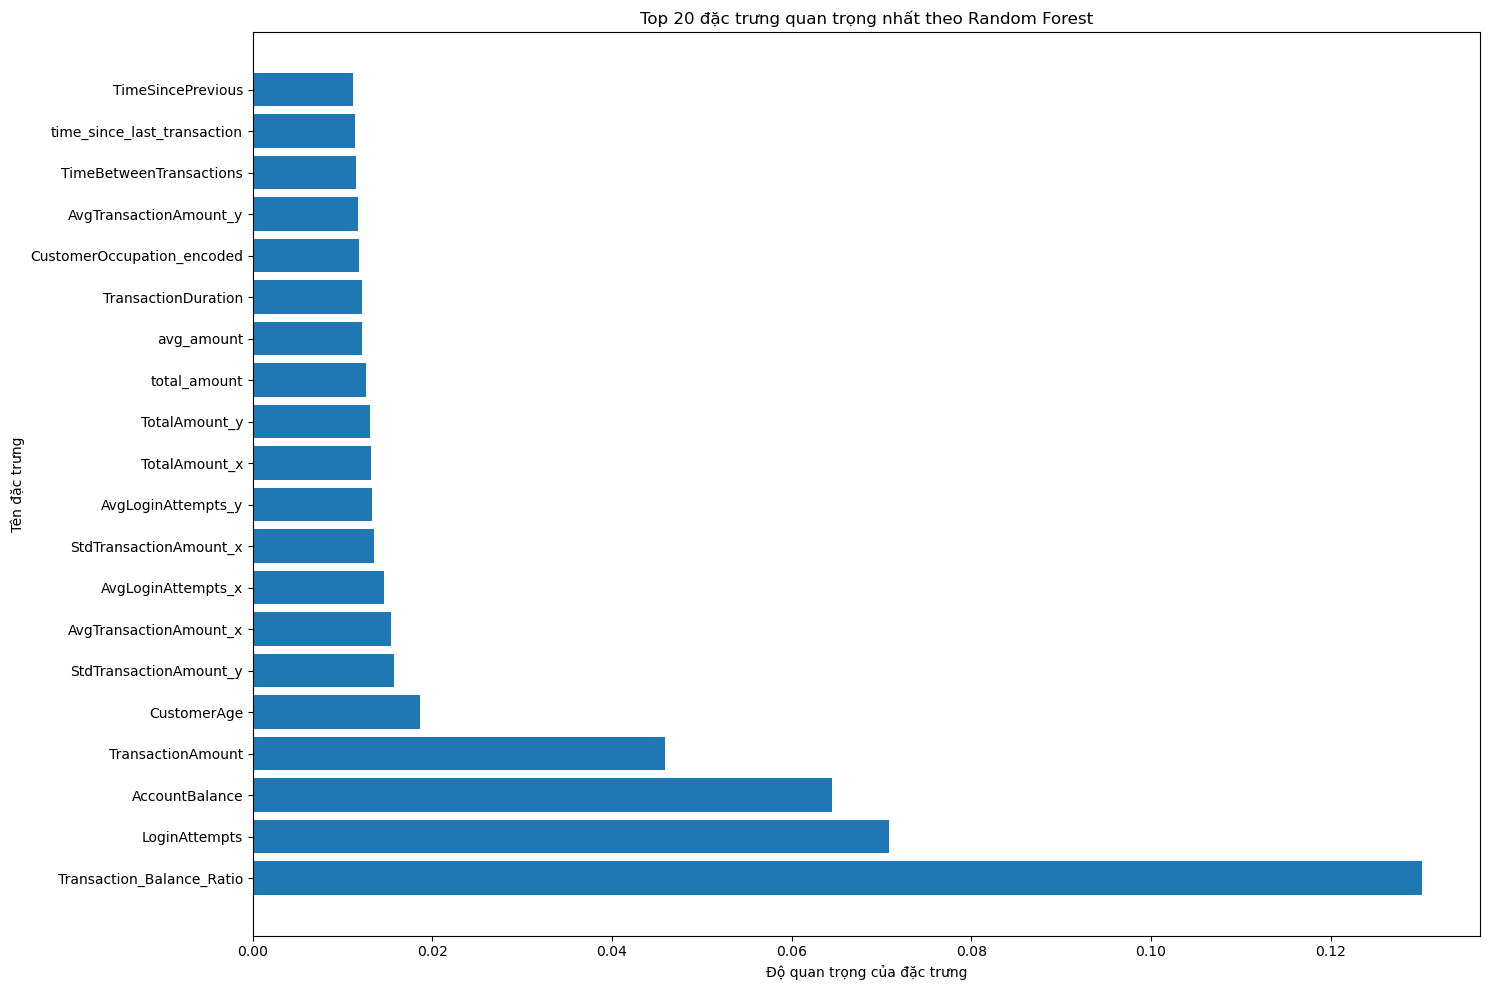


Kích thước dữ liệu sau khi chọn đặc trưng: (2512, 10)

Các đặc trưng được chọn: ['Transaction_Balance_Ratio', 'LoginAttempts', 'AccountBalance', 'TransactionAmount', 'CustomerAge', 'StdTransactionAmount_y', 'AvgTransactionAmount_x', 'AvgLoginAttempts_x', 'StdTransactionAmount_x', 'AvgLoginAttempts_y']


In [28]:
# 6. Chọn đặc trưng (Feature Selection)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

print("CHỌN ĐẶC TRƯNG QUAN TRỌNG")
print("-" * 50)

# Chuẩn bị dữ liệu
# Sử dụng FraudScore làm biến mục tiêu và chuyển thành biến nhị phân
threshold = df_encoded['FraudScore'].quantile(0.9)  # Top 10% được coi là gian lận
y = (df_encoded['FraudScore'] > threshold).astype(int)

# Chọn các cột đặc trưng (loại bỏ các cột không phù hợp)
exclude_cols = [
    'AccountID', 'TransactionID', 'FraudScore',  # Các cột ID và target
    'TransactionDate', 'PreviousTransactionDate'  # Các cột thời gian
]

# Chỉ giữ lại các cột số
feature_cols = []
for col in df_encoded.columns:
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(df_encoded[col]):
        # Kiểm tra xem cột có chứa giá trị null hoặc inf không
        if not df_encoded[col].isnull().any() and not np.isinf(df_encoded[col]).any():
            feature_cols.append(col)

X = df_encoded[feature_cols].copy()

print("\nSố lượng đặc trưng được sử dụng:", len(feature_cols))
print("Các đặc trưng:", feature_cols)

# Kiểm tra dữ liệu
print("\nKiểm tra dữ liệu:")
print("Shape của X:", X.shape)
print("Shape của y:", y.shape)
print("Kiểm tra giá trị null trong X:", X.isnull().sum().sum())
print("Kiểm tra giá trị inf trong X:", np.isinf(X).sum().sum())

# 1. Sử dụng Random Forest để đánh giá tầm quan trọng của đặc trưng
print("\n1. Chọn đặc trưng với Random Forest:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = rf.feature_importances_
feature_scores_rf = list(zip(feature_cols, feature_importance))
feature_scores_rf.sort(key=lambda x: x[1], reverse=True)

print("\nTop 10 đặc trưng quan trọng nhất (Random Forest):")
for feature, importance in feature_scores_rf[:10]:
    print(f"{feature}: {importance:.4f}")

# 2. Trực quan hóa tầm quan trọng của đặc trưng
plt.figure(figsize=(15, 10))

# Vẽ biểu đồ cho top 20 đặc trưng quan trọng nhất
top_20_features = [x[0] for x in feature_scores_rf[:20]]
top_20_importance = [x[1] for x in feature_scores_rf[:20]]

plt.barh(range(len(top_20_features)), top_20_importance)
plt.yticks(range(len(top_20_features)), top_20_features)
plt.xlabel('Độ quan trọng của đặc trưng')
plt.ylabel('Tên đặc trưng')
plt.title('Top 20 đặc trưng quan trọng nhất theo Random Forest')
plt.tight_layout()
plt.show()

# 3. Tạo DataFrame mới chỉ với các đặc trưng quan trọng
top_features = [x[0] for x in feature_scores_rf[:10]]
X_selected = X[top_features]

print("\nKích thước dữ liệu sau khi chọn đặc trưng:", X_selected.shape)
print("\nCác đặc trưng được chọn:", top_features)


XÂY DỰNG PIPELINE HUẤN LUYỆN MÔ HÌNH
--------------------------------------------------

Thông tin về dữ liệu:
Kích thước tập train: (2009, 10)
Kích thước tập test: (503, 10)
Tỷ lệ gian lận trong tập train: 8.66%
Tỷ lệ gian lận trong tập test: 8.55%

Kết quả đánh giá các mô hình:
------------------------------

Random Forest:
Cross-validation ROC-AUC: 1.000 (+/- 0.000)

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       460
           1       0.98      1.00      0.99        43

    accuracy                           1.00       503
   macro avg       0.99      1.00      0.99       503
weighted avg       1.00      1.00      1.00       503



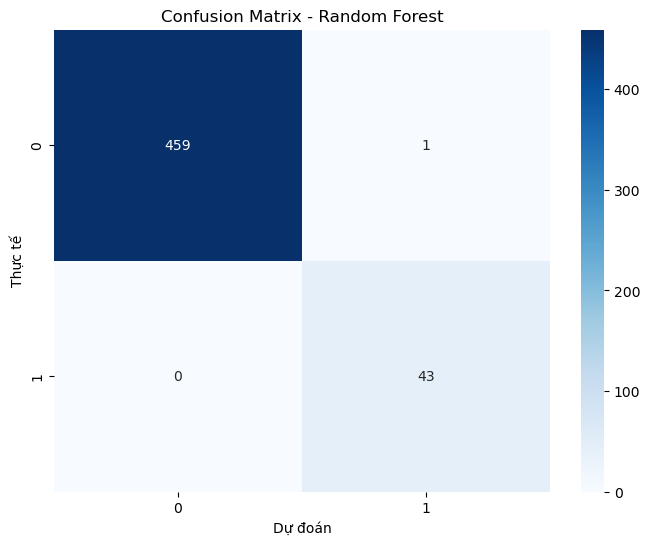


Logistic Regression:
Cross-validation ROC-AUC: 0.997 (+/- 0.002)

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       460
           1       0.81      0.98      0.88        43

    accuracy                           0.98       503
   macro avg       0.90      0.98      0.94       503
weighted avg       0.98      0.98      0.98       503



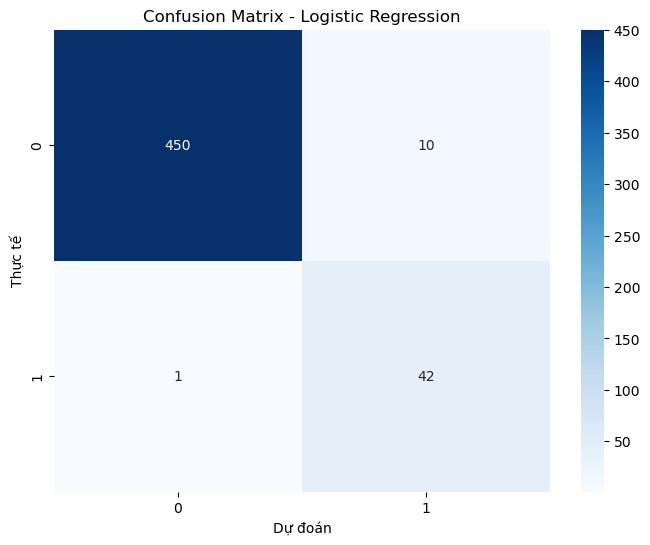


Các đặc trưng quan trọng nhất (Random Forest):
Transaction_Balance_Ratio: 0.4187
LoginAttempts: 0.2399
TransactionAmount: 0.1637
AccountBalance: 0.0996
AvgLoginAttempts_y: 0.0169
StdTransactionAmount_x: 0.0166
CustomerAge: 0.0115
StdTransactionAmount_y: 0.0115
AvgLoginAttempts_x: 0.0113
AvgTransactionAmount_x: 0.0103


In [29]:
# 7. Xây dựng pipeline huấn luyện mô hình
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("XÂY DỰNG PIPELINE HUẤN LUYỆN MÔ HÌNH")
print("-" * 50)

# Chuẩn bị dữ liệu
# Sử dụng các đặc trưng đã chọn từ bước trước
X = X_selected.copy()
threshold = df_encoded['FraudScore'].quantile(0.9)  # Top 10% được coi là gian lận
y = (df_encoded['FraudScore'] > threshold).astype(int)

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nThông tin về dữ liệu:")
print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")
print(f"Tỷ lệ gian lận trong tập train: {y_train.mean():.2%}")
print(f"Tỷ lệ gian lận trong tập test: {y_test.mean():.2%}")

# 1. Pipeline với RandomForest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    ))
])

# 2. Pipeline với LogisticRegression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ))
])

# Huấn luyện và đánh giá các mô hình
models = {
    'Random Forest': rf_pipeline,
    'Logistic Regression': lr_pipeline
}

print("\nKết quả đánh giá các mô hình:")
print("-" * 30)

for name, pipeline in models.items():
    # Huấn luyện mô hình
    pipeline.fit(X_train, y_train)
    
    # Cross-validation score
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
    
    # Dự đoán trên tập test
    y_pred = pipeline.predict(X_test)
    
    print(f"\n{name}:")
    print(f"Cross-validation ROC-AUC: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    print("\nBáo cáo phân loại:")
    print(classification_report(y_test, y_pred))
    
    # Vẽ confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Thực tế')
    plt.xlabel('Dự đoán')
    plt.show()

# Lưu mô hình tốt nhất
best_model = rf_pipeline  # Có thể thay đổi dựa trên kết quả đánh giá
best_model.fit(X, y)  # Huấn luyện lại trên toàn bộ dữ liệu

print("\nCác đặc trưng quan trọng nhất (Random Forest):")
feature_importance = best_model.named_steps['classifier'].feature_importances_
for feature, importance in sorted(zip(X.columns, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


ĐÁNH GIÁ MÔ HÌNH CHI TIẾT
--------------------------------------------------

1. Kết quả Hold-out Validation:

Mô hình: Random Forest
--------------------
Accuracy: 0.998
Precision: 0.977
Recall: 1.000
F1-score: 0.989


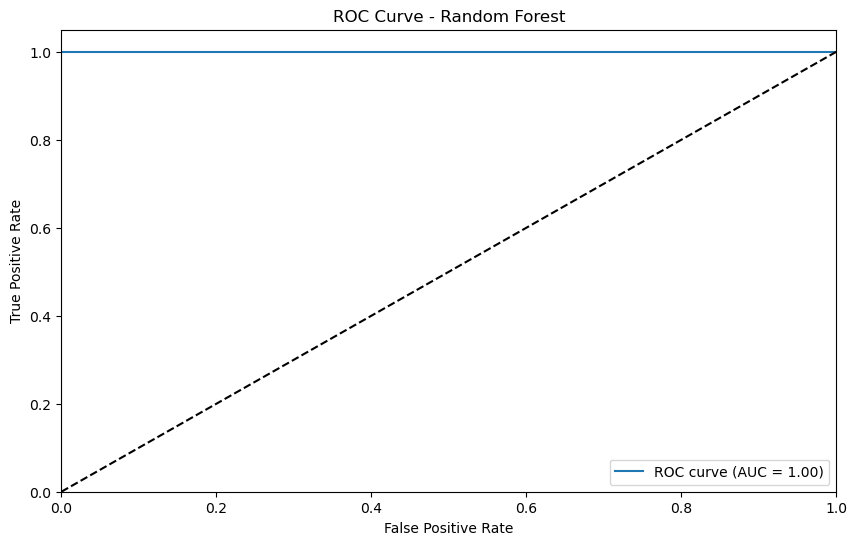

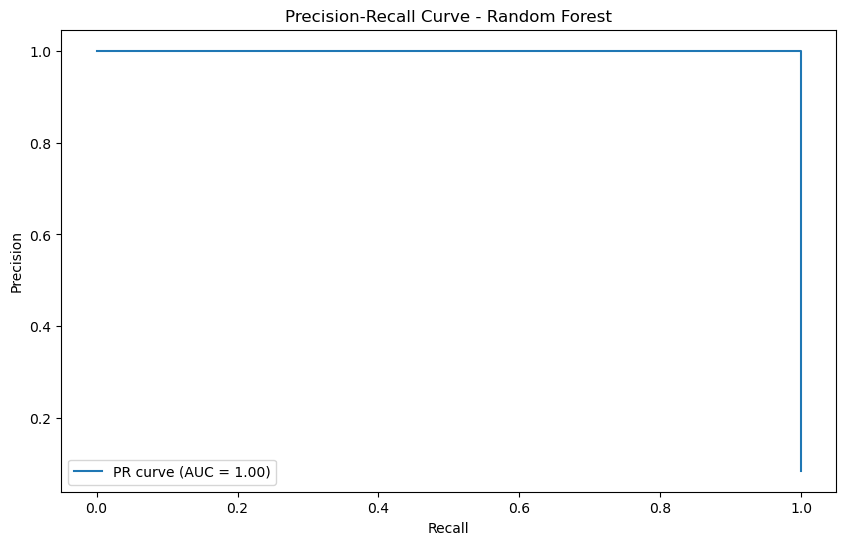


Mô hình: Logistic Regression
--------------------
Accuracy: 0.978
Precision: 0.808
Recall: 0.977
F1-score: 0.884


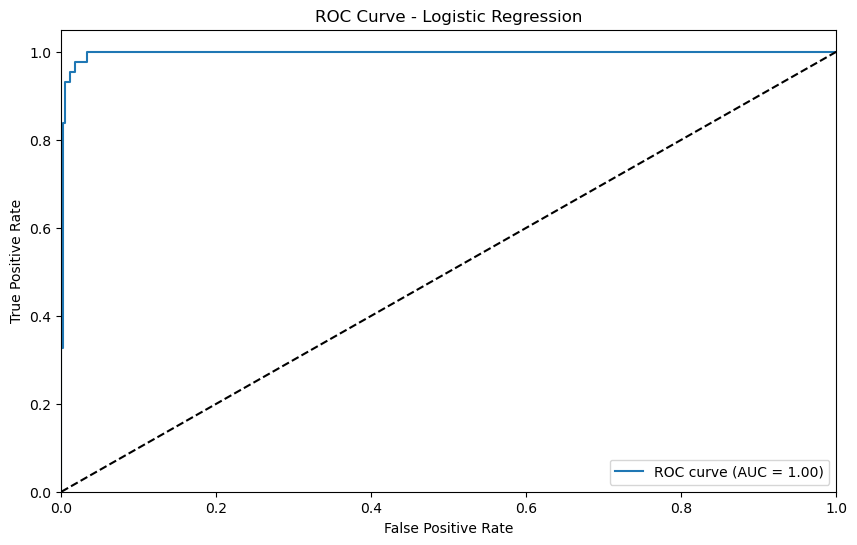

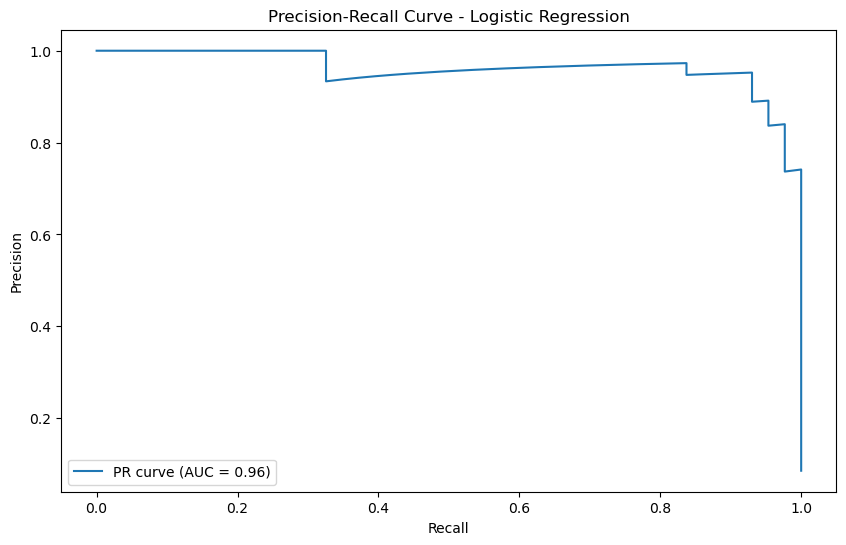


2. Kết quả K-Fold Cross Validation:

Mô hình: Random Forest
Accuracy scores: [1.         0.99602386 0.99800797 0.99800797 1.        ]
Mean accuracy: 0.998 (+/- 0.003)

Mô hình: Logistic Regression
Accuracy scores: [0.97813121 0.97614314 0.97808765 0.96812749 0.96812749]
Mean accuracy: 0.974 (+/- 0.009)

3. Kết quả Stratified K-Fold Cross Validation:

Mô hình: Random Forest
Accuracy scores: [0.99602386 0.99602386 1.         1.         1.        ]
Mean accuracy: 0.998 (+/- 0.004)

Mô hình: Logistic Regression
Accuracy scores: [0.97415507 0.97415507 0.97011952 0.96812749 0.97808765]
Mean accuracy: 0.973 (+/- 0.007)

4. Vẽ Learning Curves:


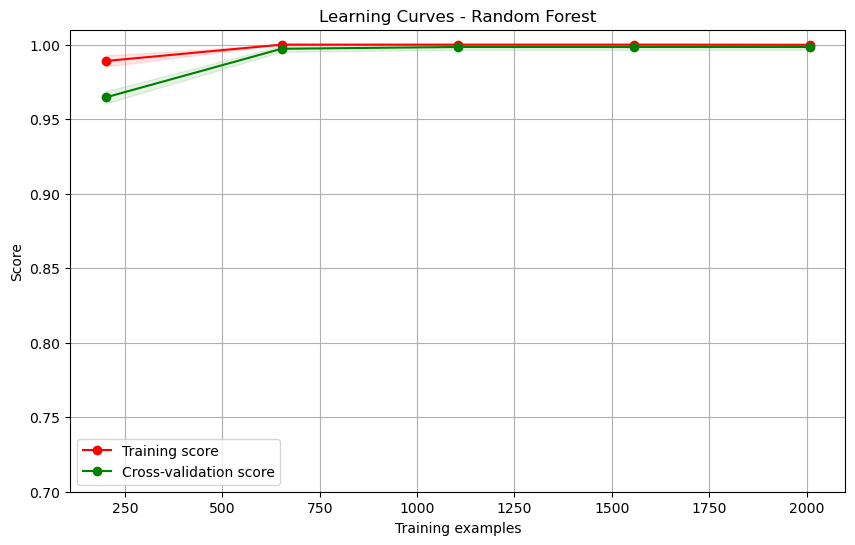

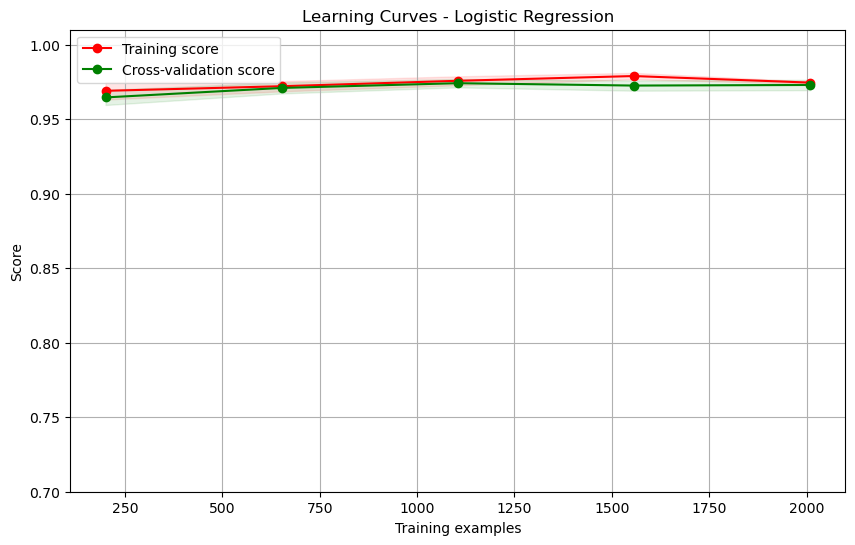

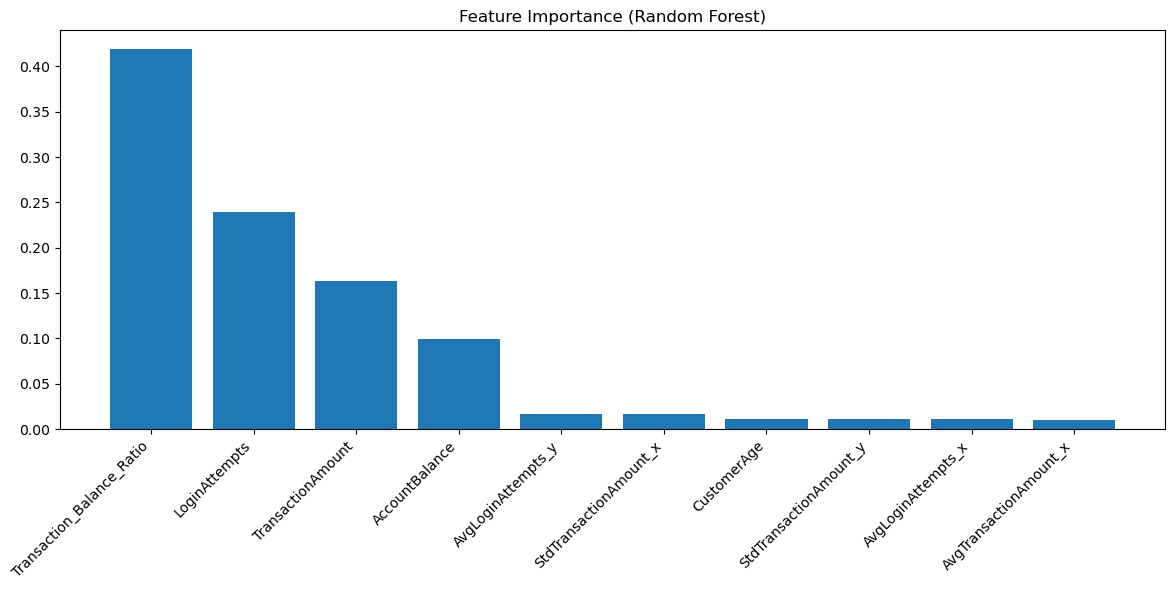


6. Phân tích ngưỡng phân loại:


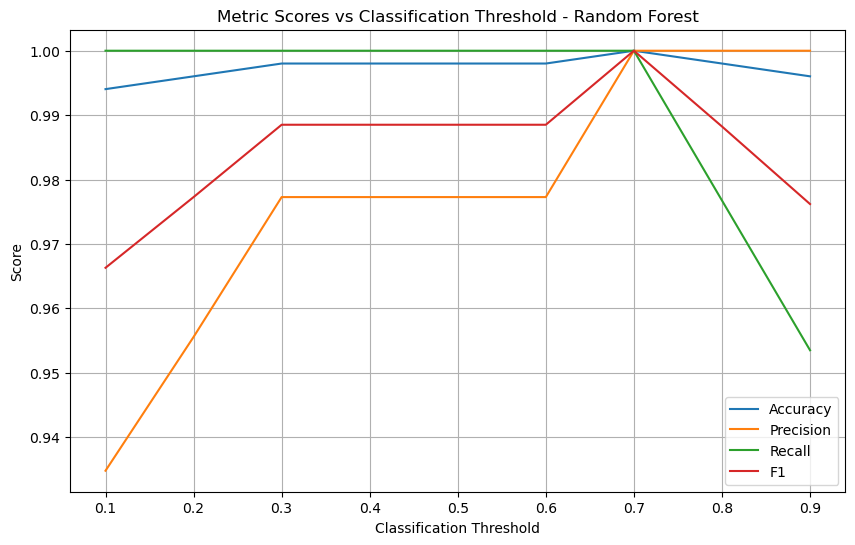

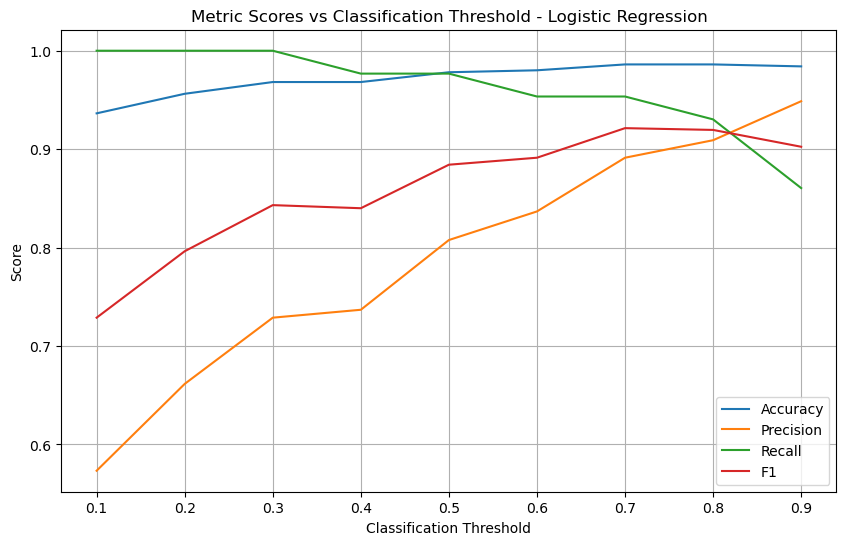

In [30]:
# 8. Đánh giá mô hình chi tiết
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_curve, auc, precision_recall_curve)
from sklearn.model_selection import KFold, StratifiedKFold, learning_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("ĐÁNH GIÁ MÔ HÌNH CHI TIẾT")
print("-" * 50)

# 1. Hold-out Validation (đã thực hiện ở cell trước)
print("\n1. Kết quả Hold-out Validation:")
for name, pipeline in models.items():
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    print(f"\nMô hình: {name}")
    print("-" * 20)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}")
    
    # Vẽ ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Vẽ Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {name}')
    plt.legend(loc="lower left")
    plt.show()

# 2. K-Fold Cross Validation
print("\n2. Kết quả K-Fold Cross Validation:")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, pipeline in models.items():
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    print(f"\nMô hình: {name}")
    print(f"Accuracy scores: {scores}")
    print(f"Mean accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

# 3. Stratified K-Fold Cross Validation
print("\n3. Kết quả Stratified K-Fold Cross Validation:")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, pipeline in models.items():
    scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')
    print(f"\nMô hình: {name}")
    print(f"Accuracy scores: {scores}")
    print(f"Mean accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

# 4. Learning Curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

print("\n4. Vẽ Learning Curves:")
for name, pipeline in models.items():
    plot_learning_curve(
        pipeline, f'Learning Curves - {name}',
        X, y, ylim=(0.7, 1.01), cv=skf, n_jobs=4)
    plt.show()

# 5. Feature Importance Analysis (cho Random Forest)
if 'Random Forest' in models:
    rf_model = models['Random Forest'].named_steps['classifier']
    feature_importance = rf_model.feature_importances_
    
    # Sắp xếp feature importance
    feature_importance_sorted = sorted(zip(X.columns, feature_importance), 
                                     key=lambda x: x[1], reverse=True)
    
    # Vẽ biểu đồ feature importance
    plt.figure(figsize=(12, 6))
    features, importance = zip(*feature_importance_sorted)
    plt.bar(range(len(importance)), importance)
    plt.xticks(range(len(importance)), features, rotation=45, ha='right')
    plt.title('Feature Importance (Random Forest)')
    plt.tight_layout()
    plt.show()

# 6. Threshold Analysis
print("\n6. Phân tích ngưỡng phân loại:")
for name, pipeline in models.items():
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    thresholds = np.arange(0.1, 1.0, 0.1)
    
    scores = []
    for threshold in thresholds:
        y_pred_threshold = (y_pred_proba >= threshold).astype(int)
        scores.append({
            'threshold': threshold,
            'accuracy': accuracy_score(y_test, y_pred_threshold),
            'precision': precision_score(y_test, y_pred_threshold),
            'recall': recall_score(y_test, y_pred_threshold),
            'f1': f1_score(y_test, y_pred_threshold)
        })
    
    # Vẽ biểu đồ metric theo threshold
    plt.figure(figsize=(10, 6))
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    for metric in metrics:
        plt.plot(thresholds, [score[metric] for score in scores], 
                label=metric.capitalize())
    
    plt.xlabel('Classification Threshold')
    plt.ylabel('Score')
    plt.title(f'Metric Scores vs Classification Threshold - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [31]:
# 9. Lưu mô hình và xuất dự đoán
import joblib
from datetime import datetime
import os

print("LƯU MÔ HÌNH VÀ XUẤT DỰ ĐOÁN")
print("-" * 50)

# 1. Tạo thư mục để lưu mô hình và kết quả
model_dir = 'models'
results_dir = 'results'
os.makedirs(model_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# 2. Lưu các mô hình
print("\n1. Lưu các mô hình:")
for name, pipeline in models.items():
    # Tạo tên file với timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"{model_dir}/fraud_detection_{name.lower().replace(' ', '_')}_{timestamp}.pkl"
    
    # Lưu mô hình
    joblib.dump(pipeline, model_filename)
    print(f"Đã lưu {name} tại: {model_filename}")

# 3. Tạo dự đoán và xuất kết quả
print("\n2. Tạo dự đoán và xuất kết quả:")
for name, pipeline in models.items():
    # Tạo dự đoán
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Tạo DataFrame kết quả
    results_df = pd.DataFrame({
        'TransactionID': df.iloc[X_test.index]['TransactionID'],  # ID giao dịch
        'AccountID': df.iloc[X_test.index]['AccountID'],          # ID tài khoản
        'TransactionAmount': df.iloc[X_test.index]['TransactionAmount'],  # Số tiền giao dịch
        'FraudScore': df.iloc[X_test.index]['FraudScore'],       # Điểm đánh giá gian lận
        'Predicted_Fraud': y_pred,                               # Dự đoán nhị phân
        'Fraud_Probability': y_pred_proba,                       # Xác suất gian lận
    })
    
    # Thêm thông tin về độ tin cậy của dự đoán
    results_df['Prediction_Confidence'] = np.where(
        y_pred_proba >= 0.5,
        y_pred_proba,
        1 - y_pred_proba
    )
    
    # Thêm nhãn mức độ tin cậy
    results_df['Confidence_Level'] = pd.cut(
        results_df['Prediction_Confidence'],
        bins=[0, 0.6, 0.8, 1.0],
        labels=['Thấp', 'Trung bình', 'Cao']
    )
    
    # Sắp xếp theo xác suất gian lận giảm dần
    results_df = results_df.sort_values('Fraud_Probability', ascending=False)
    
    # Tạo tên file với timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    results_filename = f"{results_dir}/fraud_predictions_{name.lower().replace(' ', '_')}_{timestamp}.csv"
    
    # Lưu kết quả
    results_df.to_csv(results_filename, index=False)
    print(f"Đã lưu kết quả dự đoán của {name} tại: {results_filename}")
    
    # In thống kê tổng quan
    print(f"\nThống kê dự đoán của {name}:")
    print(f"Tổng số giao dịch: {len(results_df)}")
    print(f"Số giao dịch được dự đoán là gian lận: {results_df['Predicted_Fraud'].sum()}")
    print("\nPhân bố mức độ tin cậy:")
    print(results_df['Confidence_Level'].value_counts())
    
    # Hiển thị top 5 giao dịch có khả năng gian lận cao nhất
    print("\nTop 5 giao dịch có khả năng gian lận cao nhất:")
    print(results_df.head().to_string())

print("\n3. Hướng dẫn sử dụng mô hình đã lưu:")
print("""
Để sử dụng mô hình đã lưu, bạn có thể dùng đoạn code sau:

```python
import joblib

# Nạp mô hình
model = joblib.load('đường_dẫn_đến_file_model.pkl')

# Dự đoán
predictions = model.predict(X_new)
probabilities = model.predict_proba(X_new)[:, 1]
```

Lưu ý:
- X_new phải có cùng cấu trúc với dữ liệu huấn luyện
- Kết quả dự đoán được lưu trong file CSV bao gồm:
  + TransactionID: ID giao dịch
  + AccountID: ID tài khoản
  + TransactionAmount: Số tiền giao dịch
  + FraudScore: Điểm đánh giá gian lận ban đầu
  + Predicted_Fraud: Dự đoán nhị phân (0: không gian lận, 1: gian lận)
  + Fraud_Probability: Xác suất gian lận (0-1)
  + Prediction_Confidence: Độ tin cậy của dự đoán
  + Confidence_Level: Mức độ tin cậy (Thấp/Trung bình/Cao)
""")


LƯU MÔ HÌNH VÀ XUẤT DỰ ĐOÁN
--------------------------------------------------

1. Lưu các mô hình:
Đã lưu Random Forest tại: models/fraud_detection_random_forest_20250725_213600.pkl
Đã lưu Logistic Regression tại: models/fraud_detection_logistic_regression_20250725_213600.pkl

2. Tạo dự đoán và xuất kết quả:
Đã lưu kết quả dự đoán của Random Forest tại: results/fraud_predictions_random_forest_20250725_213600.csv

Thống kê dự đoán của Random Forest:
Tổng số giao dịch: 503
Số giao dịch được dự đoán là gian lận: 44

Phân bố mức độ tin cậy:
Confidence_Level
Cao           500
Trung bình      3
Thấp            0
Name: count, dtype: int64

Top 5 giao dịch có khả năng gian lận cao nhất:
     TransactionID AccountID  TransactionAmount  FraudScore  Predicted_Fraud  Fraud_Probability  Prediction_Confidence Confidence_Level
1707      TX001708   AC00366             566.33           4                1                1.0                    1.0              Cao
1605      TX001606   AC00257           